In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import os
import matplotlib.ticker as ticker
from adjustText import adjust_text
import copy
import statistics
import pandas as pd
from itertools import chain
c=299792458

In [2]:
def open_file():
    path='C:\\Users\\zyx\\Desktop\\data\\spectrum\\1arcsec'  #设置存储路径
    files= os.listdir(path) #得到文件夹下的所有文件名称
    data=[]  # 建立空列表储存数据
    data_i=0 # 记录是第几个文件
    for file in files:  #按照顺序在 files 里面进行每一个文件的 数据名称 循环读取
        position = path+"\\"+file   # 打开第一个文件
        data.append([])
        with open(position, 'r') as f:
            line_num=0
            for line in f:
                if line_num>0:
                    data[data_i].append(line.strip().split())
                line_num+=1
        data_i+=1
    return data  

In [3]:
file_path = "C:\\Users\\zyx\\Desktop\\Spectral with Machine Learning\\data\\CO_and_HCO\\source.vsys.dat"
import pandas as pd

# 假设文件格式：
# 列名: ID   Vsys   RA    Dec
# 数据: 001  250.3  12.5  30.0
# 注释行以 '#' 开头

df = pd.read_csv(
    file_path,
    sep='\s+',          # 按空格/制表符分隔
    comment='#',        # 忽略注释行
    header=0,           # 第一行为列名
    #names=['ID', 'Vsys', 'RA', 'Dec']  # 可选：手动指定列名
)

print(df)   # df.head()则默认输出前五行数据，在数据量大的时候可以方便检查

   source, field,        ra,       dec,       Vsys,  Vsys_sigma
0     Ll01   Ll01  81.505174 -67.503328  287.328125    0.983483
1     Ll02   Ll02  73.534500 -66.775389  274.113342    1.343082
2     Ll03   Ll03  84.478441 -69.576586  265.006836    0.913653
3     Ll04   Ll04  75.983875 -67.344111  269.604950    2.035654
4   Ll04_2   Ll04  75.982767 -67.345826  268.652863    1.179893
..     ...    ...        ...        ...         ...         ...
66     S07    S07  13.514352 -73.327366  163.216629    1.475220
67     S08    S08  12.257295 -73.186037  146.751221    1.218433
68     S09    S09  11.235079 -73.169770  132.257156    2.265169
69     S10    S10  16.280342 -71.995208  189.761490    1.967455
70   S10_2    S10  16.274230 -71.995216  190.884918    1.150420

[71 rows x 6 columns]


In [4]:
sou=df["source,"].tolist()
V=df["Vsys,"].tolist()
for i in range(len(sou)):
    if sou[i]=='Lh07':
        target_velocity=V[i]
        break
print(target_velocity)

239.5157166


In [5]:
def open_file():
    path='C:\\Users\\zyx\\Desktop\\Spectral with Machine Learning\\data\\spw1'  #设置存储路径
    files= os.listdir(path) #得到文件夹下的所有文件名称
    name_list=source_name(files) # 得到每个源的名字
    data=[]  # 建立空列表储存数据
    data_i=0 # 记录是第几个文件

    for file in files:  #按照顺序在 files 里面进行每一个文件的 数据名称 循环读取
        position = path+"\\"+file   # 打开第一个文件
        data.append([])
        with open(position, 'r') as f:
            line_num=0
            for line in f:
                if line_num>0:
                    data[data_i].append(line.strip().split())
                line_num+=1
        data_i+=1
    return data,name_list

In [45]:
# 导入所有谱线的信息
file_path = "C:/Users/zyx/Desktop/Spectral with Machine Learning/data/linelist.txt"

# 假设文件格式：
# 列名: ID   Vsys   RA    Dec
# 数据: 001  250.3  12.5  30.0
# 注释行以 '#' 开头

df_spectrum = pd.read_csv(
    file_path,
    sep='\s+',          # 按空格/制表符分隔
    #comment='#',        # 忽略注释行
    header=0,           # 第一行为列名
    #names=['ID', 'Vsys', 'RA', 'Dec']  # 可选：手动指定列名
)

print(df_spectrum) 
spectrum_name=df_spectrum.iloc[:,0].tolist()
spectrum_fre=df_spectrum.iloc[:,1].tolist()
print(spectrum_name)
print(spectrum_fre)

         SO2  345.33853910
0        SO2    345.338786
1        SO2    345.448982
2        SO2    346.523878
3        SO2    346.652167
4      34SO2    344.245348
..       ...           ...
59     CH3OH    358.605799
60   CH3OCH3    357.460202
61   CH3OCH3    358.451943
62  H40delta    356.658427
63   H45zeta    359.580103

[64 rows x 2 columns]
['SO2', 'SO2', 'SO2', 'SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', '34SO2', 'SO', 'SO', 'SO+', 'CO', 'SiO', 'H13CO+', 'CH3OH', 'CH3OH', 'CH3OH', 'CH3OH', 'CH3OCH3', 'CH3OCH3', 't-HCOOH', 't-HCOOH', 'H37gamma', 'HC15N', 'HC3N', '33SO2', '33SO2', 'NS???', 'SO2_v2=1???', '13CH3OH???', 'CH3OCHO???', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', 'SO2', '34SO2', '34SO2', '34SO2', '34SO2', 'HCO+', 'CH3OH', 'CH3OH', 'CH3OCH3', 'CH3OCH3', 'H40delta', 'H45zeta']
[345.3387862, 345.4489815, 346.5238776, 346.6521672, 344.2453476, 344.581045, 344.8079157,

In [7]:
def source_name(name):
    name_list=[]
    for i in range(len(name)):
        part=name[i].split(".")
        name_list.append(part[1])
    return name_list

In [8]:
def data_to_xy(data):   # 输入某一个文件的数据，转换成xy
    data_x=[]
    data_y=[]
    for i in range(len(data)):
        data_x.append(float(data[i][0]))
        data_y.append(float(data[i][1]))
    return data_x,data_y

In [9]:
def paint(x,y):    # 把光谱画出来
    plt.figure(figsize=(6,4))
    plt.plot(x,y)
    plt.xlabel("frequency (GHz)")
    plt.ylabel("flux (Jy/beam)")
    #plt.autoscale(enable=True, axis='y', tight=True)
    #plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

In [10]:
def hebin(list_x,list_y):    # 把列表每三个数据合成一个
    list_x_new=[]
    list_y_new=[]
    for i in range(int(len(list_x)/3)):
        x0=list_x[3*i]
        x1=list_x[3*i+1]
        x2=list_x[3*i+2]
        y0=list_y[3*i]
        y1=list_y[3*i+1]
        y2=list_y[3*i+2]
        list_x_new.append((x0+x1+x2)/3)
        list_y_new.append((y0+y1+y2)/3)
    return list_x_new,list_y_new

In [11]:
def noise_sigma(raw_data,a):  # 合并了
    noise=raw_data[a:a+300]    #宽度为0.2Hz的噪声区间
    noise_x,noise_y=data_to_xy(noise)
    noise_x1,noise_y1=hebin(noise_x,noise_y)
    paint(noise_x1,noise_y1)
    return noise_y1

In [12]:
def noise_sigma2(raw_data,a):  # 没合并
    noise=raw_data[a:a+300]    #宽度为0.2Hz的噪声区间
    noise_x,noise_y=data_to_xy(noise)
    paint(noise_x,noise_y)
    return noise_y

In [13]:
# 去掉3σ外的数据（把噪声3σ下的删掉）
def remove_3sigma2(list1,list2,noise_level):
    list3=[]
    a=max(list2)
    for i in range(len(list2)):
        if list2[i]<noise_level*3:
            list3.append(0)
        else:
            list3.append(list2[i])
     
    for i in range(len(list3)):     #把某一个突起值去掉
        if i<len(list3)-5:
            if list3[i]==0 and list3[i+2]==0 and list3[i+1]<a:   # 不能把峰值去掉了
                list3[i+1]=0
            elif list3[i]==0 and list3[i+3]==0 and list3[i+1]<a and list3[i+2]<a:
                list3[i+1]=0
                list3[i+2]=0
    return list3

# 去掉3σ外的数据（把噪声3σ下的删掉）（没有合并时）
def remove_3sigma3(list1,list2,noise_level):
    list3=copy.deepcopy(list2)
    a=max(list2)
    n_a=list2.index(a)
# 从最大值开始往左边找
    for i in range(n_a-1,-1,-1):
        if list3[i]<noise_level*3 and list3[i-1]<noise_level*3:
            #print("去除噪声（左边）")
            for j in range(i):
                list3[j]=0
            break
# 从最大值开始往右边找
    for i in range(n_a,len(list3)):
        if list3[i]<noise_level*3 and list3[i+1]<noise_level*3:
            #print("去除噪声（右边）")
            for j in range(i,len(list3)):
                list3[j]=0
            break
    return list3

# 去掉噪声（小于0的话直接去掉）（没有合并时）
def remove_3sigma4(list1,list2,noise_level):
    list3=copy.deepcopy(list2)
    a=max(list2)
    n_a=list2.index(a)
# 从最大值开始往左边找
    for i in range(n_a-1,-1,-1):
        if list3[i]<0:
            #print("去除噪声（左边）")
            for j in range(i+1):
                list3[j]=0
            break
# 从最大值开始往右边找
    for i in range(n_a,len(list3)):
        if list3[i]<0:
            #print("去除噪声（右边）")
            for j in range(i,len(list3)):
                list3[j]=0
            break
    return list3

In [14]:
# 放大谱线
def enlarge2(peak_list,x,y,v):
    large_peak_list_x=[]    #放大后的谱线
    large_peak_list_y=[]
    data_x=np.array(x)
    data_x_real=data_x/(1-(v*10e3/(3.0*10e8)))   # 把频率的红移/蓝移移回来
    #data_x_real=[float('{:.8f}'.format(j)) for j in data_x_real]

    for i in range(len(peak_list)):
        if peak_list[i]<=45:
            data_x=data_x_real[0:peak_list[i]+45]
            data_y=y[0:peak_list[i]+45]
            #print("在前端")
        elif peak_list[i]+45>=len(data_x_real):
            data_x=data_x_real[peak_list[i]-45:len(data_x_real)]
            data_y=y[peak_list[i]-45:len(data_x_real)]
            #print("在后端")
        else:
            data_x=data_x_real[peak_list[i]-45:peak_list[i]+45]
            #print(data_x)
            data_y=y[peak_list[i]-45:peak_list[i]+45]
            #print(data_y)
            #print("刚好在中间")
            
        large_peak_list_x.append(data_x)
        large_peak_list_y.append(data_y)
        
        #paint(data_x,data_y)
    return large_peak_list_x,large_peak_list_y

In [15]:
# 归一化
def guiyihua(list5):
    a_max=max(list5)
    list6=[]
    for i in range(len(list5)):
        list6.append(list5[i]/a_max)
    return list6

In [16]:
# 插值法对齐频率
import numpy as np
from scipy.interpolate import interp1d

def align_spectra_to_grid(spectra, f_start=None, f_end=None, df=None, kind='linear'):
    """
    将多个光谱对齐到统一的频率网格。
    
    参数：
        spectra (list of dict): 每个字典包含'f'和'flux'数组。
        f_start (float): 统一频率范围的起始值。若为None，自动计算。
        f_end (float): 统一频率范围的结束值。若为None，自动计算。
        df (float): 频率步长。若为None，取所有光谱的最小步长。
        kind (str): 插值方法（'linear', 'cubic', 'nearest'）。
    
    返回：
        f_new (np.array): 统一频率网格。
        aligned_flux (np.array): 对齐后的流量矩阵（光谱数 × 频率点数）。
    """
    # 自动确定频率范围和步长
    if f_start is None or f_end is None:
        all_f = np.concatenate([spec['f'] for spec in spectra])
        f_start = all_f.min() if f_start is None else f_start
        f_end = all_f.max() if f_end is None else f_end
    
    if df is None:
        df_list = [np.diff(spec['f']).min() for spec in spectra]
        df = min(df_list)
    
    # 生成统一频率网格
    f_new = np.arange(f_start, f_end + df, df)
    
    # 插值每个光谱
    aligned_flux = []
    for spec in spectra:
        f_orig = spec['f']
        flux_orig = spec['flux']
        # 创建插值函数（超出范围填充NaN）
        interp_func = interp1d(f_orig, flux_orig, kind=kind, bounds_error=False, fill_value=0)
        flux_new = interp_func(f_new)
        aligned_flux.append(flux_new)
    
    return f_new, np.array(aligned_flux)

In [17]:
data,name_list=open_file()

In [18]:
# 用直方图求误差

# 定义高斯函数
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

def histogram(y,i):
    data_y=np.array(y)
    print("min:{}".format(min(data_y)))
    # ============ 1. 计算并绘制直方图 ============
    plt.figure(figsize=(7,4))
    #plt.ylim(0,10)

    # 绘制直方图并获取统计量
    bins = np.linspace(min(data_y)-0.01,max(data_y)+0.01, 100)
    counts, bin_edges, _ = plt.hist(
        data_y, 
        bins=bins, 
        density=True,       # 归一化为概率密度
        alpha=0.7, 
        color='skyblue',
        edgecolor='white',
        label='Histogram'
    )
    #print("counts",counts)
    # 计算每个分箱的中心点（用于拟合）
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_centers_cut=bin_centers[0:30]
    counts_cut=counts[0:30]
    # ============ 2. 高斯拟合 ============
    print("------------------------开始拟合---------------------")
    # 初始参数估计（幅度、均值、标准差）
    print(np.mean(data_y),np.std(data_y))
    initial_guess = [np.max(counts) * 1.2, np.mean(data_y), np.std(data_y)]

    # 执行曲线拟合
   # 设置参数边界：振幅>0，标准差>0
    lower_bounds = [0, -1, 0]     # [amp_min, mean_min, std_min]
    upper_bounds = [np.inf, 1, 1]  # [amp_max, mean_max, std_max]

    params, params_cov = curve_fit(
        gaussian,
        bin_centers_cut,
        counts_cut,
        p0=initial_guess,
        bounds=(lower_bounds, upper_bounds),
        maxfev=100000)  # 关键：添加边界约束

    # 提取拟合参数
    amp, mean, std = params
    print(f"拟合结果: 幅度={amp:.4f}, 均值={mean:.4f}, 标准差={std:.4f}")

    # 生成拟合曲线数据
    x_fit = np.linspace(bin_centers_cut[0],bin_centers_cut[-1], 30)
    y_fit = gaussian(x_fit, amp, mean, std)

    # ============ 3. 绘制拟合结果 ============
    # 绘制拟合曲线
    print("--------------------------画图------------------------")
    plt.plot(x_fit, y_fit, 'r-', linewidth=2.5, label='Gaussian Fit')
    plt.show()

In [19]:
def gaussian(x, amp, mean, std):
    """高斯函数定义"""
    return amp * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

def histogram_ds(y):
    data_y = np.array(y)
    print(f"数据统计: 最小值={np.min(data_y):.4f}, 最大值={np.max(data_y):.4f}, 均值={np.mean(data_y):.4f}")
    
    # ============ 1. 数据预处理和直方图计算 ============
    plt.figure(figsize=(10, 6))
    
    # 动态调整分箱数量和范围
    data_range = np.max(data_y) - np.min(data_y)
    bin_count = min(100, len(data_y)//10)  # 根据数据量动态调整分箱数
    bins = np.linspace(
        np.min(data_y) - 0.01 * data_range,
        np.max(data_y) + 0.01 * data_range,
        bin_count
    )
    
    counts, bin_edges, _ = plt.hist(
        data_y, 
        bins=bins, 
        density=True,
        alpha=0.7, 
        color='skyblue',
        edgecolor='white',
        label='Histogram'
    )
    
    # 计算分箱中心点（使用整个数据范围）
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # ============ 2. 改进的高斯拟合 ============
    print("------------------------开始拟合---------------------")
    
    # 更智能的初始参数估计
    peak_idx = np.argmax(counts)
    peak_value = counts[peak_idx]
    peak_center = bin_centers[peak_idx]
    
    # 计算标准差时使用峰值附近的点
    half_max_idx = np.where(counts > peak_value/2)[0]
    if len(half_max_idx) > 1:
        std_estimate = (bin_centers[half_max_idx[-1]] - bin_centers[half_max_idx[0]]) / 2.355
    else:
        std_estimate = data_range / 10  # 回退估计
    
#     std_estimate=np.std(data_y)
    
    initial_guess = [peak_value, peak_center, max(std_estimate, 0.01)]
    print(f"初始估计: 幅度={initial_guess[0]:.4f}, 均值={initial_guess[1]:.4f}, 标准差={initial_guess[2]:.4f}")
    
    # 动态设置边界（基于数据范围）
    data_range = np.max(data_y) - np.min(data_y)
    bounds = (
        [0.1 * peak_value, peak_center - 2*data_range, 0.001],  # 下界
        [10 * peak_value, peak_center + 2*data_range, 10*data_range]  # 上界
    )
    
    try:
        # 使用更鲁棒的优化方法
        params, params_cov = curve_fit(
            gaussian,
            bin_centers,
            counts,
            p0=initial_guess,
            bounds=bounds,
            method='trf',  # 使用TRF算法处理边界
            maxfev=50000,
            ftol=1e-5,      # 放宽收敛容差
            xtol=1e-5
        )
        
        amp, mean, std = params
        print(f"拟合成功: 幅度={amp:.4f}, 均值={mean:.4f}, 标准差={std:.4f}")
        
        # 生成拟合曲线
        x_fit = np.linspace(np.min(bin_centers), np.max(bin_centers), 500)
        y_fit = gaussian(x_fit, amp, mean, std)
        
        # ============ 3. 绘制结果 ============
        #plt.ylim(0,10)
        plt.plot(x_fit, y_fit, 'r-', linewidth=2.5, label=f'Gaussian Fit (σ={std:.4f})')
        plt.axvline(mean, color='green', linestyle='--', label=f'Mean: {mean:.4f}')
        plt.title(f'Histogram and Gaussian Fit ')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()
        
        return std
    
    except Exception as e:
        print(f"!!! 拟合失败: {str(e)}")
        plt.title("Histogram (Fit Failed)")
        plt.show()
        return None, None

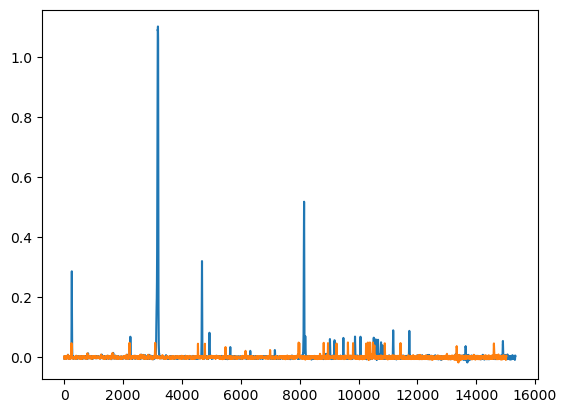

数据统计: 最小值=-0.0168, 最大值=1.1019, 均值=0.0056
------------------------开始拟合---------------------
初始估计: 幅度=80.8244, 均值=0.0009, 标准差=0.1119
拟合成功: 幅度=22.6776, 均值=0.0009, 标准差=0.0057


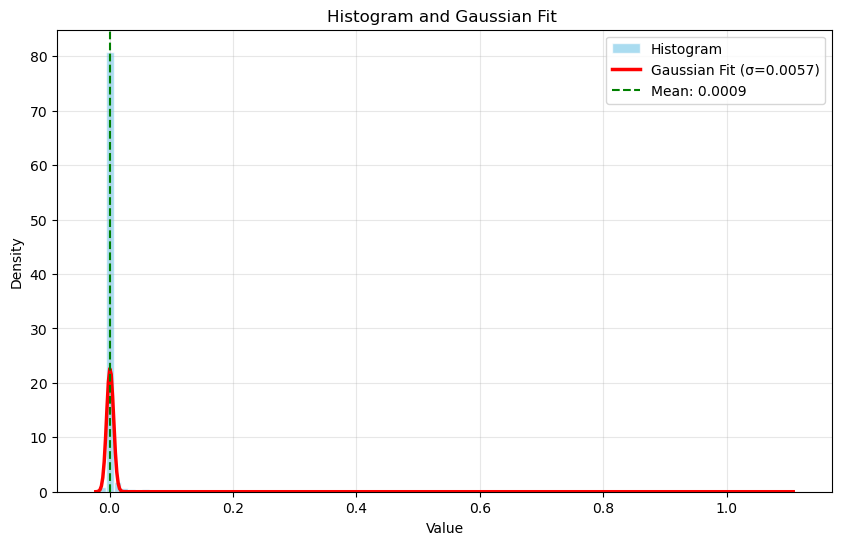

数据统计: 最小值=-0.0168, 最大值=0.0499, 均值=0.0009
------------------------开始拟合---------------------
初始估计: 幅度=186.9692, 均值=0.0001, 标准差=0.0100
拟合成功: 幅度=180.6665, 均值=0.0000, 标准差=0.0021


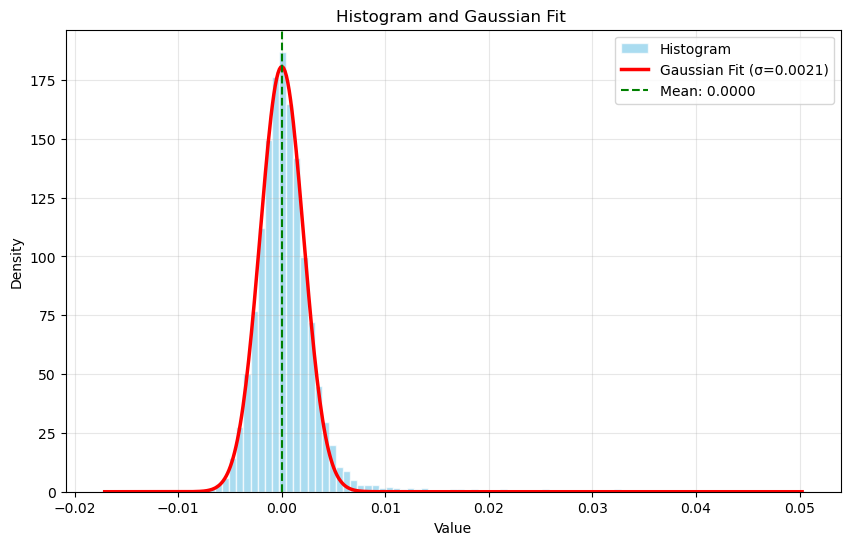

In [20]:
# 把五个spw合并，待会用直方图求标准差

all_spectrum=[]
filter_spectrum=[]
for i in range(len(data)):
    if name_list[i]=='Lh10':
        x,y=data_to_xy(data[i])
        all_spectrum.extend(y)

filter_spectrum=[x for x in all_spectrum if x<=0.05]
plt.plot(all_spectrum)
plt.plot(filter_spectrum)
plt.show()

std=histogram_ds(all_spectrum)
std2=histogram_ds(filter_spectrum)

spw_std=std2

In [21]:
# 把静止频率修正
spectrum_fre_v=[]
for i in range(len(spectrum_fre)):
    spectrum_fre_v.append(spectrum_fre[i]*(1-target_velocity*10e3/(3.0*10e8)))

std:0.0020900954527300164


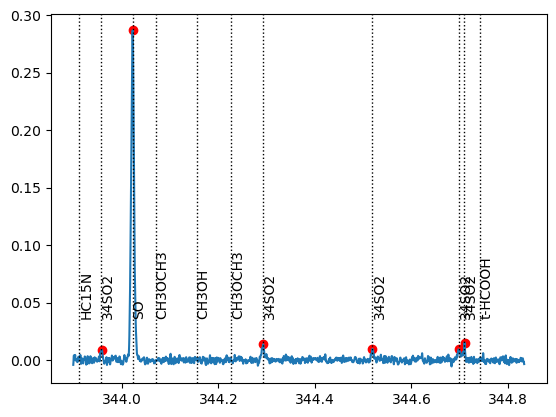

std:0.0020900954527300164


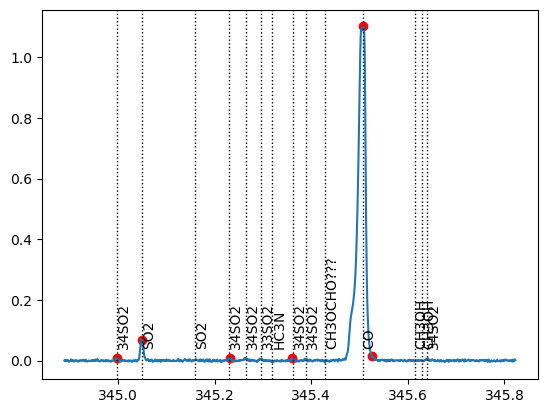

std:0.0020900954527300164


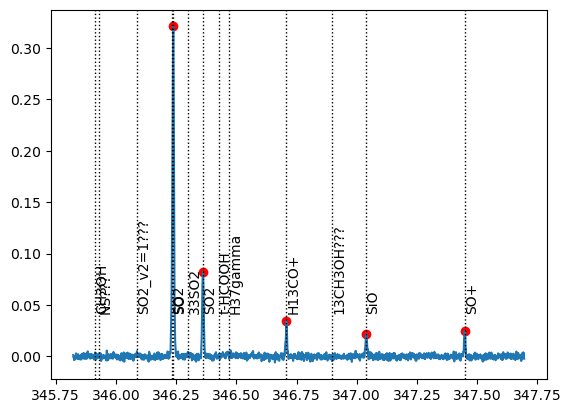

std:0.0020900954527300164


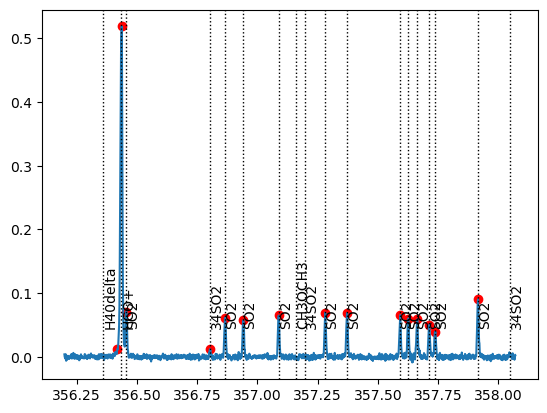

std:0.0020900954527300164


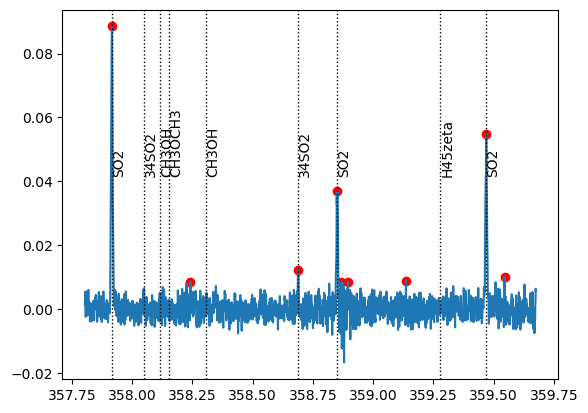

[[121, 252, 806, 1269, 1635, 1660], [222, 328, 703, 966, 1266, 1305], [850, 1103, 1812, 2492, 3326], [451, 487, 526, 1237, 1365, 1520, 1822, 2218, 2403, 2855, 2923, 3000, 3103, 3154, 3516], [230, 897, 1812, 2146, 2181, 2237, 2729, 3412, 3567]]


In [46]:
target_x=[]  # 把某一个源的x和y提出来
target_y=[]
peak_list=[]
n=0
for i in range(len(data)):
    if name_list[i]=='Lh10':
        x,y=data_to_xy(data[i])
        target_x.append(x)
        target_y.append(y)
        print("std:{}".format(spw_std))
        peaks, properties = find_peaks(y, height=4*spw_std,distance=25)
        peak_list.append(list(peaks))
        for j in range(len(peaks)):
            plt.plot(x[peaks[j]],y[peaks[j]],marker='o',color='red')

        #plt.ylim(-0.01,0.05)
        plt.plot(x,y)
        
        for j in range(len(spectrum_name)):
            if x[0]<spectrum_fre_v[j]<x[-1]:
                plt.axvline(x=spectrum_fre_v[j], color="black", linestyle=":", linewidth=1) # 标准谱线已根据速度修正
                plt.text(
                    spectrum_fre_v[j],  # 文本X位置（竖线右侧）
                    y[0]+0.04,  # 文本Y位置
                    spectrum_name[j], 
                    rotation=90,  # 垂直旋转
                    color="black",
                    va="bottom"   # 垂直对齐
                    )
        
        plt.show()
        n+=1
print(peak_list)

In [30]:
x_large_tem,y_large_tem=enlarge2(peak_list[3],target_x[3],target_y[3],target_velocity)

In [31]:
x_large=[]       # 把谱线挑出来放大
y_large=[]
for i in range(len(peak_list)):
    x_large_tem,y_large_tem=enlarge2(peak_list[i],target_x[i],target_y[i],target_velocity)
    x_large.append(x_large_tem)
    y_large.append(y_large_tem)
# print(len(x_large))
# print((x_large[0]))
# print((x_large[0][0]))
#print(x_large)

In [32]:
x_large = list(chain.from_iterable(
    [item] if not isinstance(item, list) else item 
    for item in x_large
))
y_large = list(chain.from_iterable(
    [item] if not isinstance(item, list) else item 
    for item in y_large
))
print(len(x_large))


41


In [33]:
print(spectrum_fre)  # 没有修正速度！

[345.3387862, 345.4489815, 346.5238776, 346.6521672, 344.2453476, 344.581045, 344.8079157, 344.9875851, 344.9981616, 345.168666, 345.2856217, 345.5196584, 345.5530949, 345.6512957, 345.6787895, 345.9292848, 344.310612, 346.528481, 347.740011, 345.7959899, 347.330631, 346.998344, 344.443433, 345.903916, 345.91926, 346.202719, 344.3580659, 344.5153801, 345.030561, 346.718858, 346.7584855, 344.2003199, 345.60901, 345.5846957, 346.5900976, 346.220137, 346.3791906, 347.188283, 345.718662, 356.7551893, 357.16536, 357.24119, 357.38757, 357.5814483, 357.67178, 357.892442, 357.92596, 357.96289, 358.01309, 358.03808, 358.21564, 359.151156, 359.7706815, 357.1021822, 357.4977581, 358.3473131, 358.9879745, 356.734223, 358.414648, 358.605799, 357.4602017, 358.4519426, 356.65842723, 359.58010263]


34SO2
0


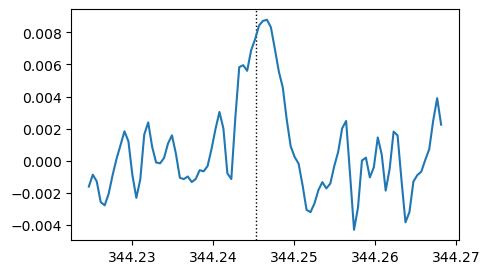

SO
1


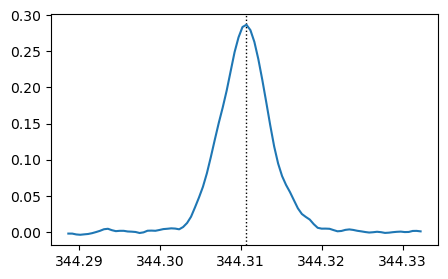

34SO2
2


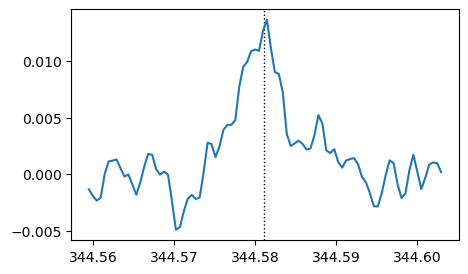

34SO2
3


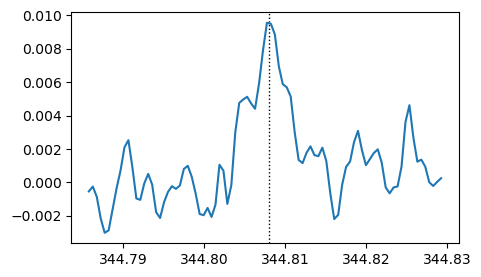

34SO2
4


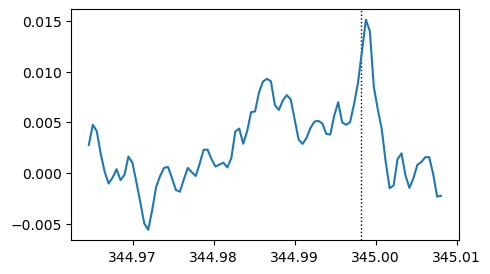

34SO2
5


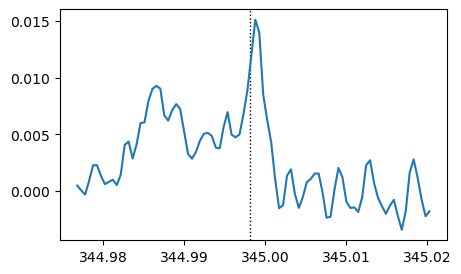

34SO2
6


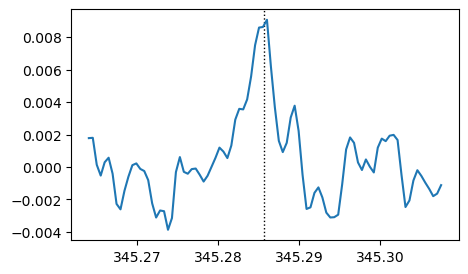

SO2
7


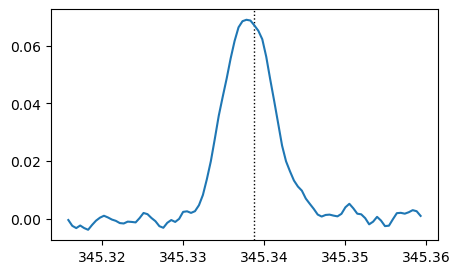

34SO2
8


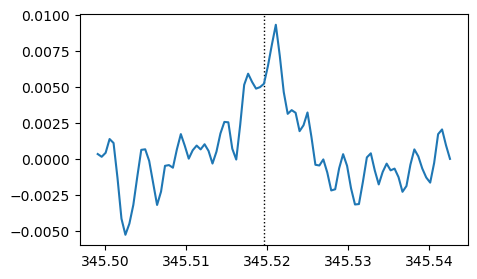

34SO2
9


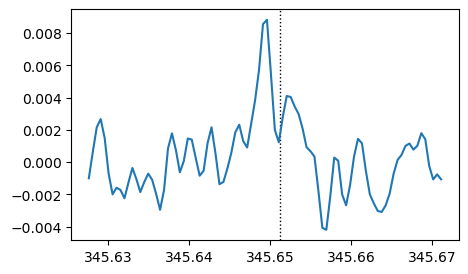

CO
10


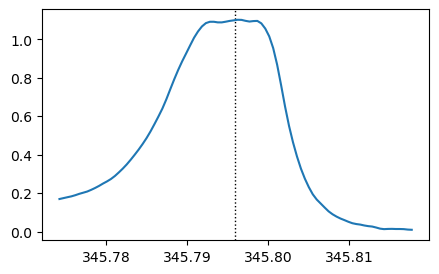

CO
11


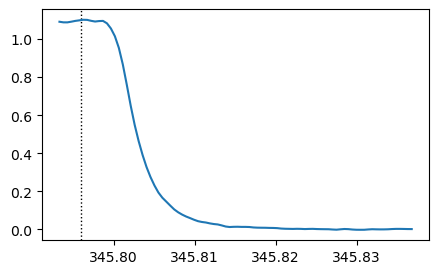

SO
12


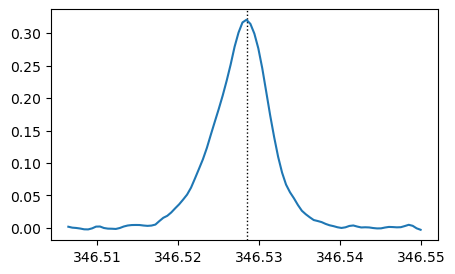

SO2
13


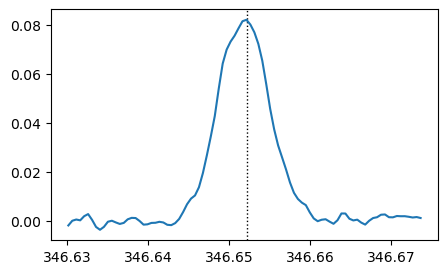

H13CO+
14


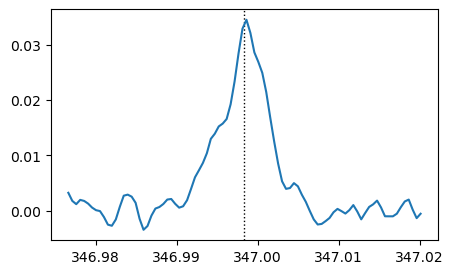

SiO
15


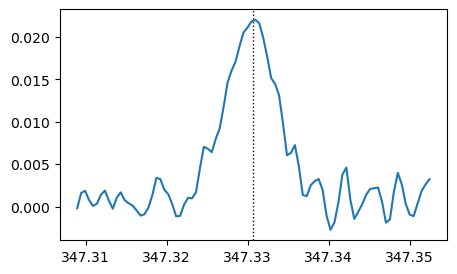

SO+
16


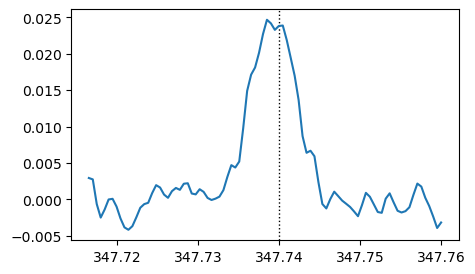

HCO+
17


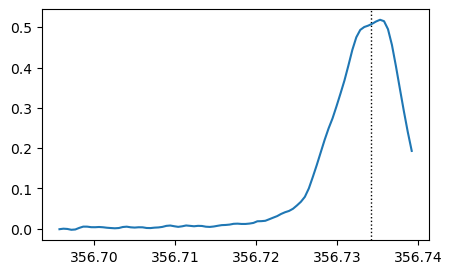

HCO+
18


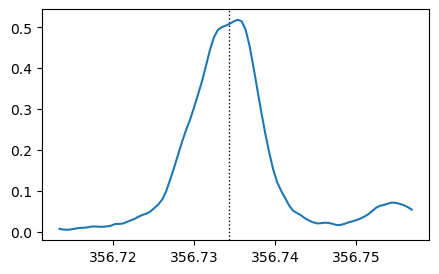

HCO+
19


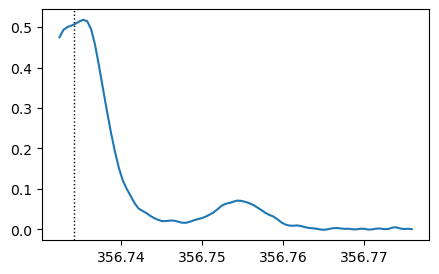

34SO2
20


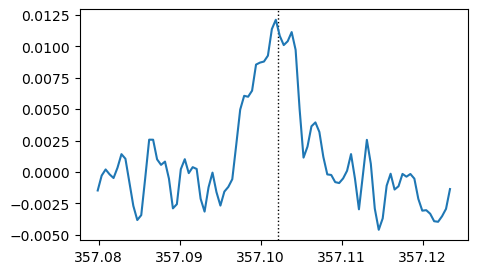

SO2
21


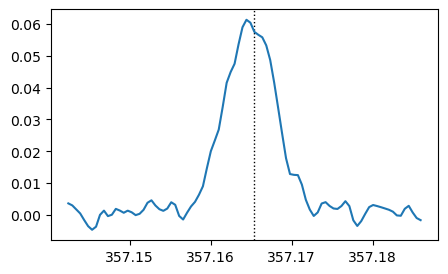

SO2
22


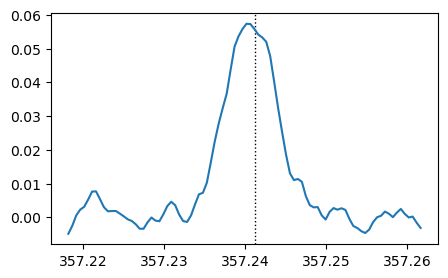

SO2
23


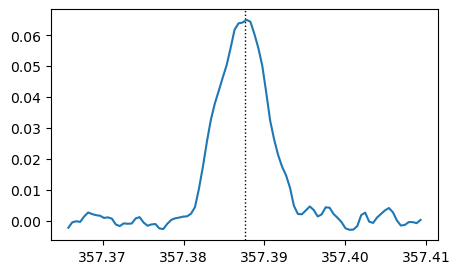

SO2
24


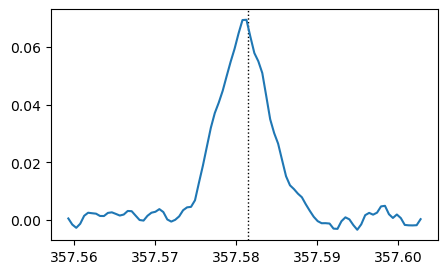

SO2
25


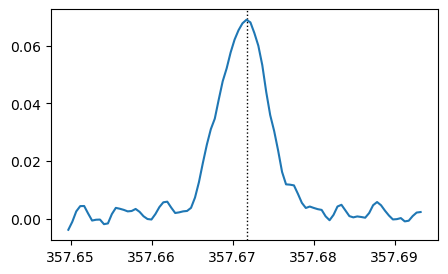

SO2
26


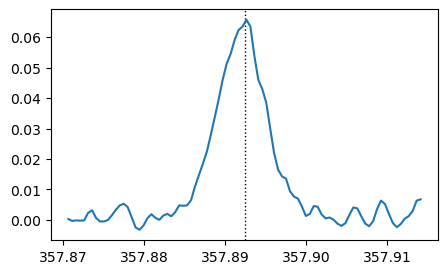

SO2
27


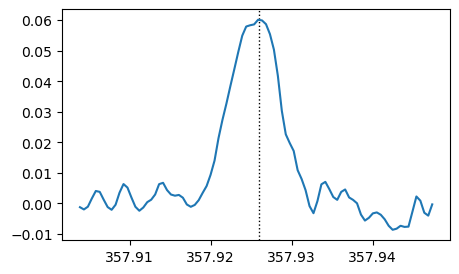

SO2
28


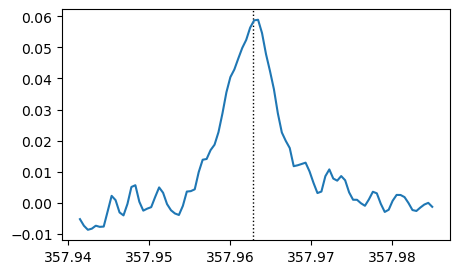

SO2
29


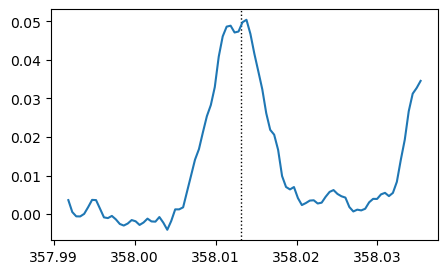

SO2
30


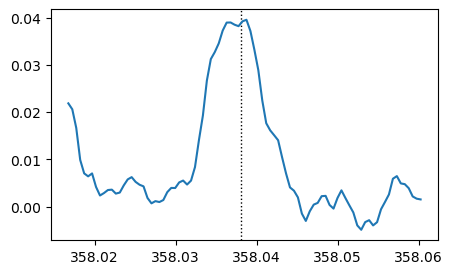

SO2
31


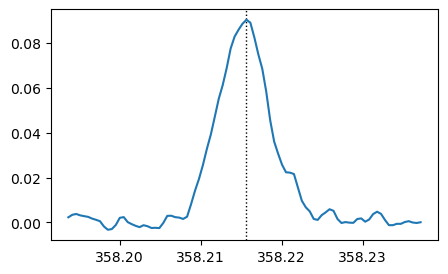

SO2
32


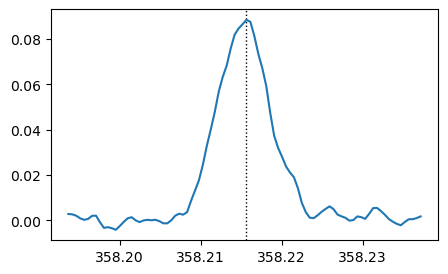

34SO2
34


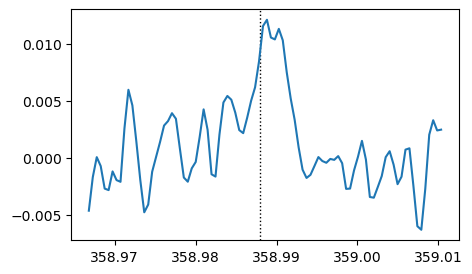

SO2
35


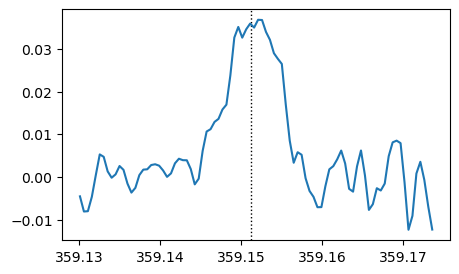

SO2
36


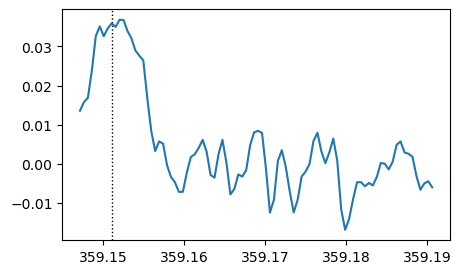

SO2
39


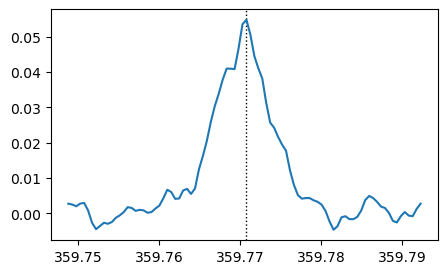

[33, 37, 38, 40]


In [34]:
# 画出单独的谱线，并找出每一根谱线的名字
peak_name=[]
peak_fre=[]
shan=[]
for i in range(len(x_large)):  # 循环找到的谱线
    puxian=[]
    for k in range(len(spectrum_fre)):   # 对某一根谱线
        peak_index=y_large[i].index(max(y_large[i]))  # 找到该区间的峰值
        puxian.append(abs(x_large[i][peak_index]-spectrum_fre[k]))  # 计算峰值的频率与所有谱线的频率的差，以谱线表为顺序

    if min(puxian)<0.01:  # 如果差值小于一定值
        puxian_index=puxian.index(min(puxian))   # 则认为差值最小的就是该谱线，记录这条谱线在谱线表中的位置为puxian_index
        print(spectrum_name[puxian_index])    # 输出谱线名字
        print(i)  # 输出这是总谱线表中的第几条谱线
        peak_name.append(spectrum_name[puxian_index])  # 将这个谱线的名字记录在peak_name中
        peak_fre.append(spectrum_fre[puxian_index])   # 将这个谱线的静止频率记录在peak_fre中
        # 画图
        plt.figure(figsize=(5,3))
        plt.axvline(x=spectrum_fre[puxian_index], color="black", linestyle=":", linewidth=1)
        plt.plot(x_large[i],y_large[i])
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.show()
    else:   # 如果差值都很大，认为这个点为误差点，不代表任何谱线，记录这个点的位置，待会删掉
        shan.append(i)
print(shan)

In [35]:
# 删掉找不到的谱线
print(len(shan))
for i in range(len(shan)-1,-1,-1):
#     print(i)
    del x_large[shan[i]]
    del y_large[shan[i]]
print(len(x_large))

4
37


In [36]:
# print(x_large)

34SO2
0


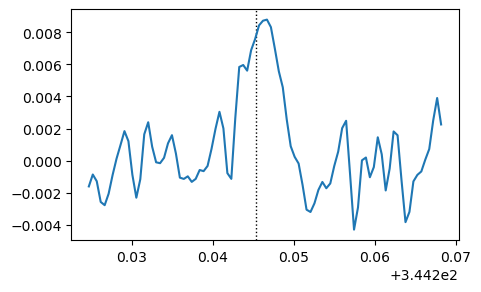

SO
1


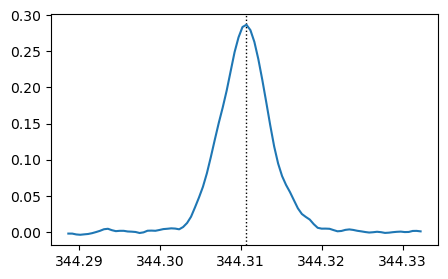

34SO2
2


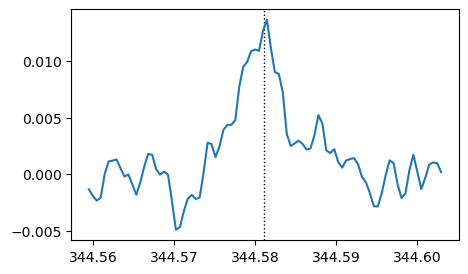

34SO2
3


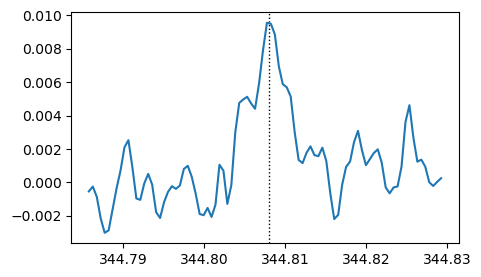

34SO2
4


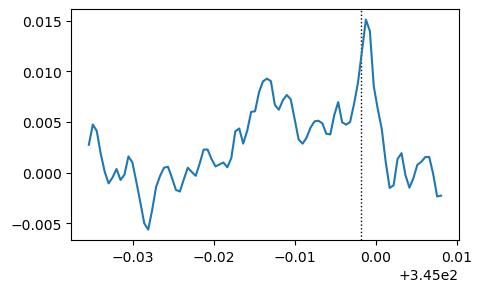

34SO2
5


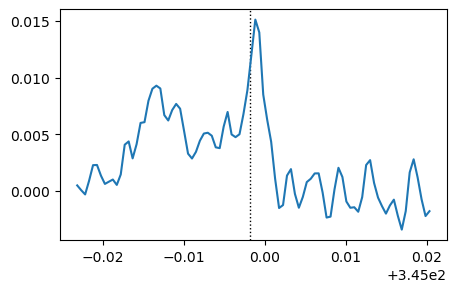

34SO2
6


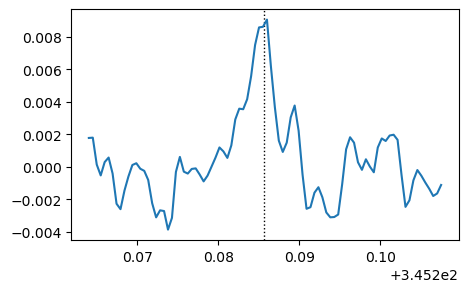

SO2
7


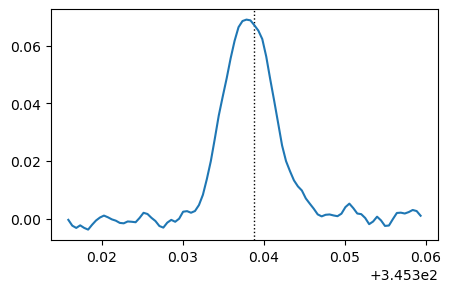

34SO2
8


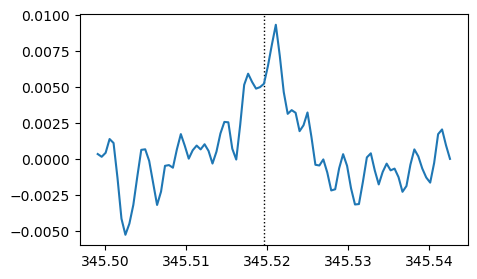

34SO2
9


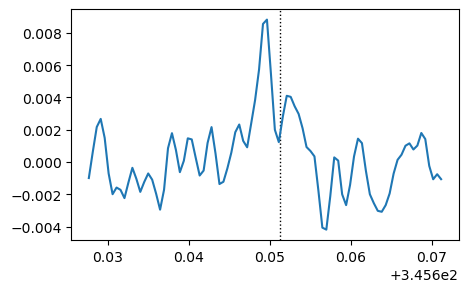

CO
10


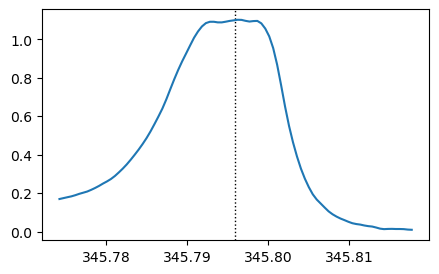

CO
11


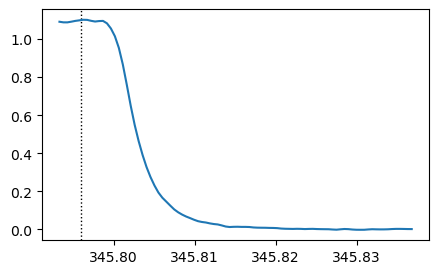

SO
12


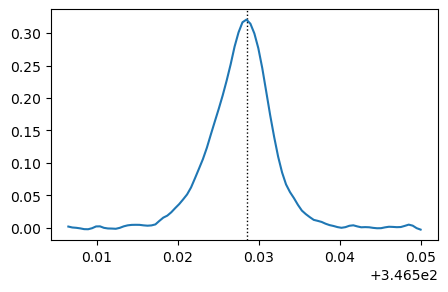

SO2
13


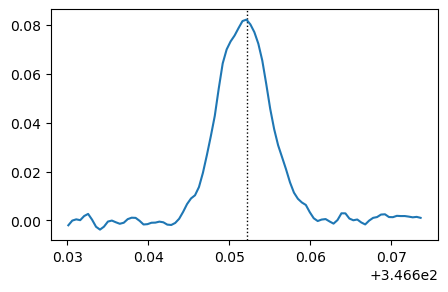

H13CO+
14


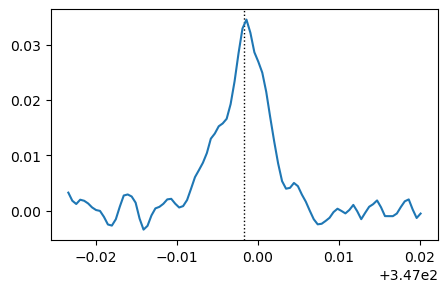

SiO
15


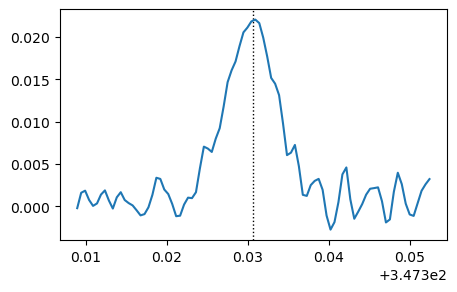

SO+
16


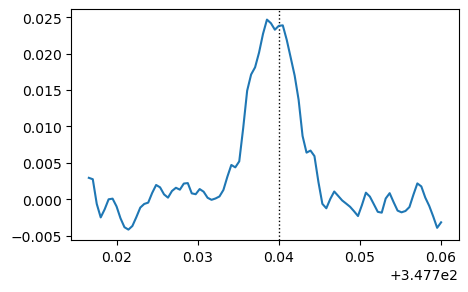

HCO+
17


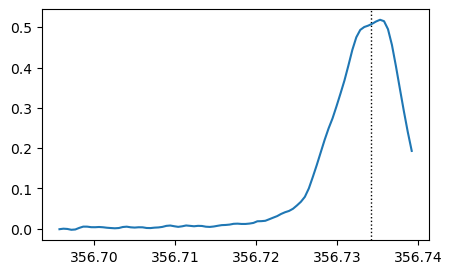

HCO+
18


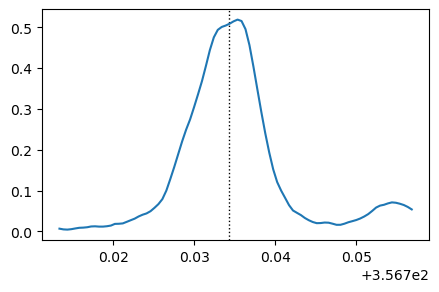

HCO+
19


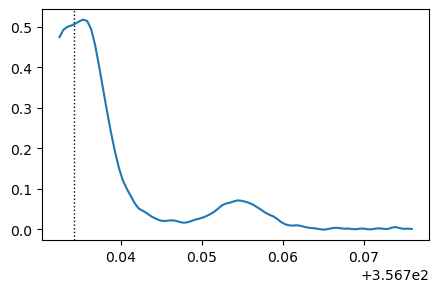

34SO2
20


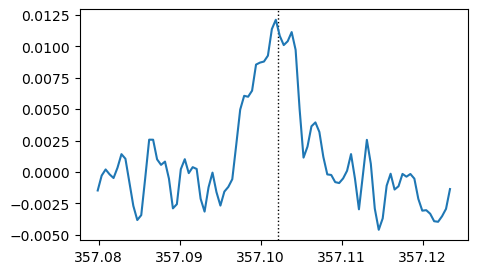

SO2
21


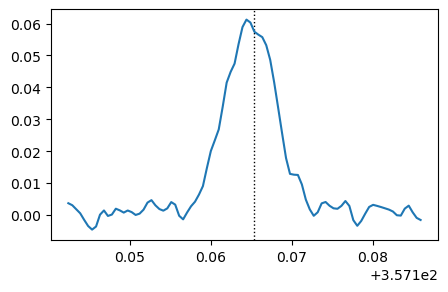

SO2
22


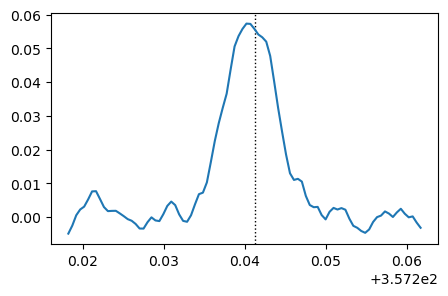

SO2
23


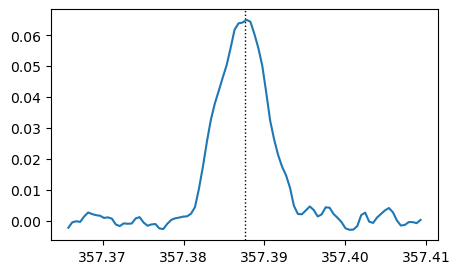

SO2
24


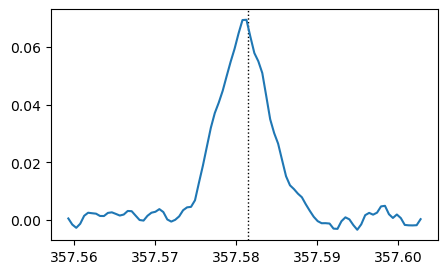

SO2
25


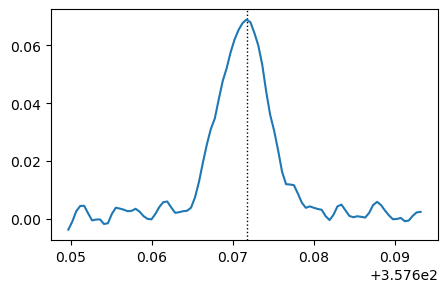

SO2
26


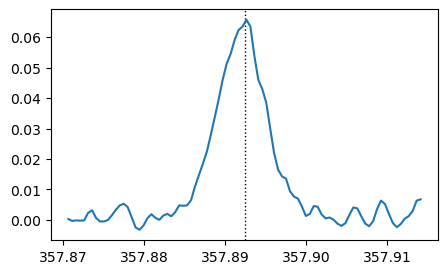

SO2
27


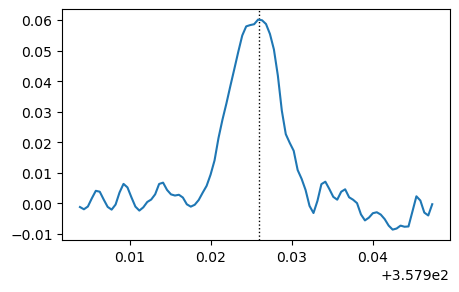

SO2
28


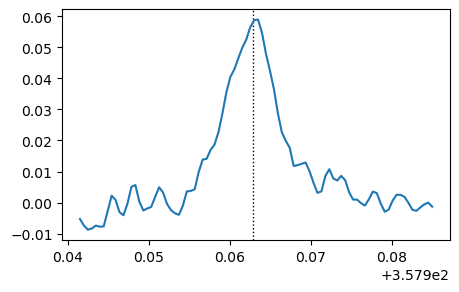

SO2
29


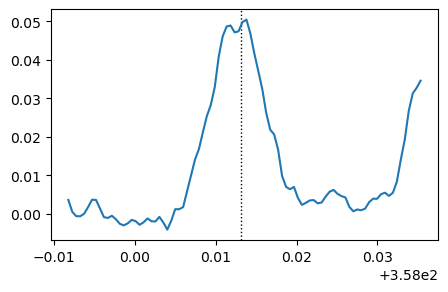

SO2
30


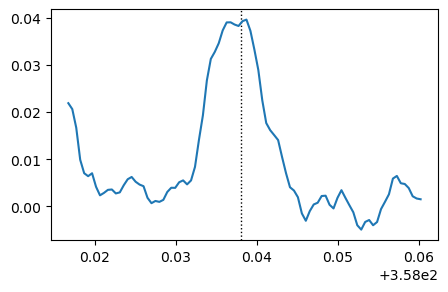

SO2
31


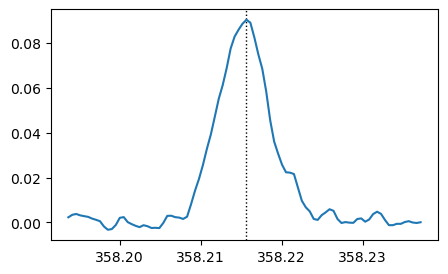

SO2
32


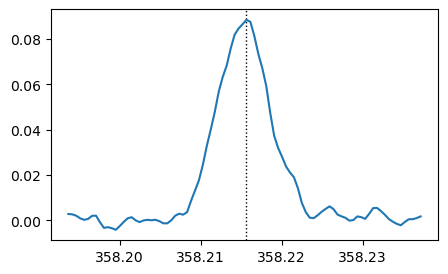

34SO2
33


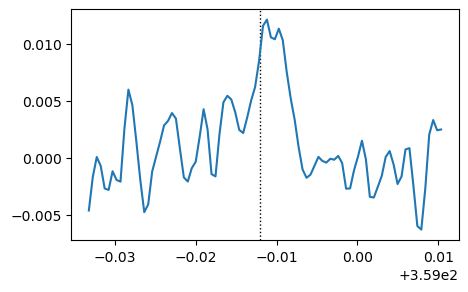

SO2
34


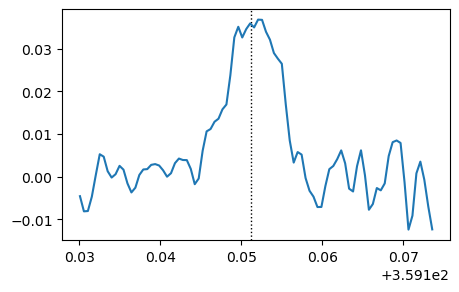

SO2
35


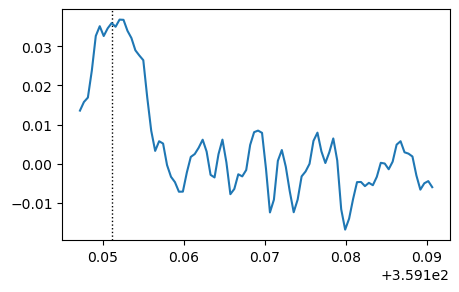

SO2
36


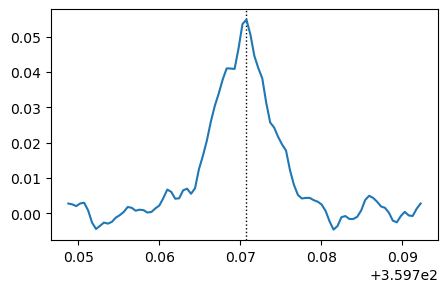

In [37]:
# 人工复检
for i in range(len(x_large)):
    print(peak_name[i])
    print(i)
    plt.figure(figsize=(5,3))
    plt.axvline(x=peak_fre[i], color="black", linestyle=":", linewidth=1)
    plt.plot(x_large[i],y_large[i])
    plt.show()


In [38]:
# 人工删除
shan2=[4,11,17,19,35]   # 手动输入需要删掉的谱线
for i in range(len(shan2)-1,-1,-1):
    del x_large[shan2[i]]
    del y_large[shan2[i]]
    del peak_fre[shan2[i]]
    del peak_name[shan2[i]]

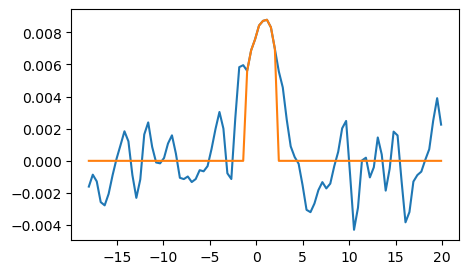

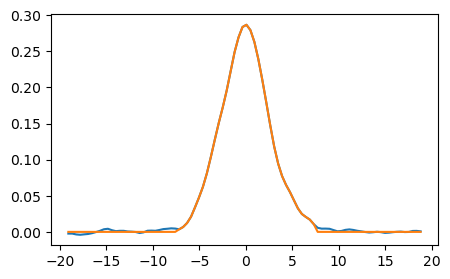

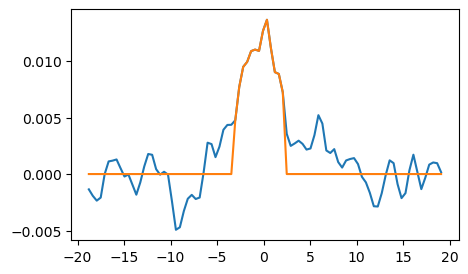

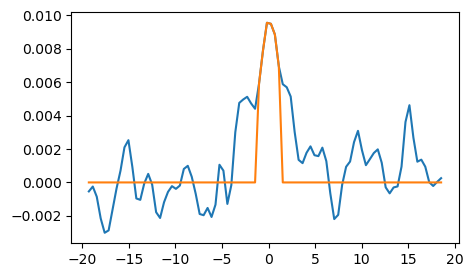

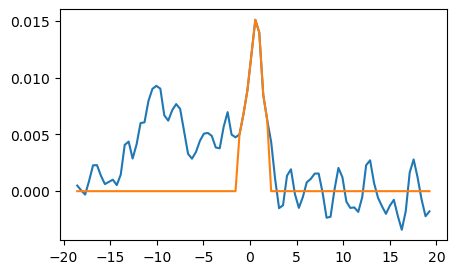

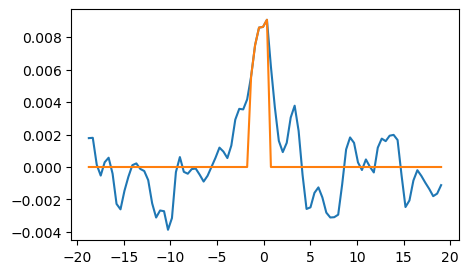

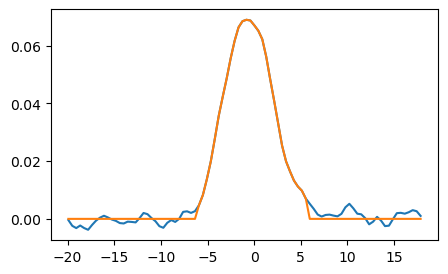

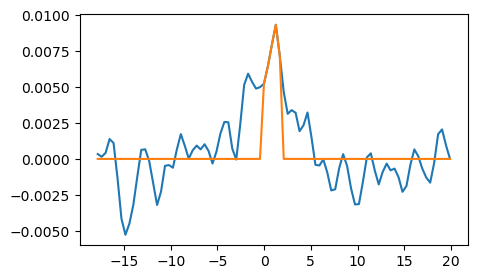

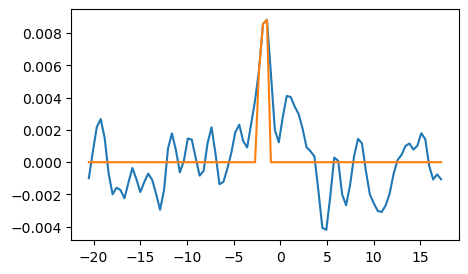

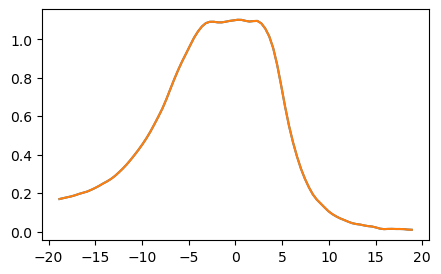

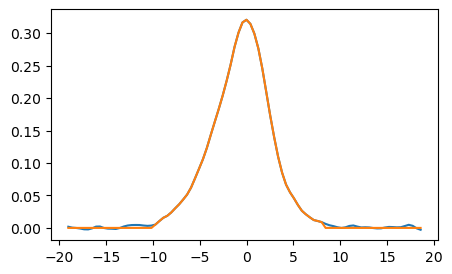

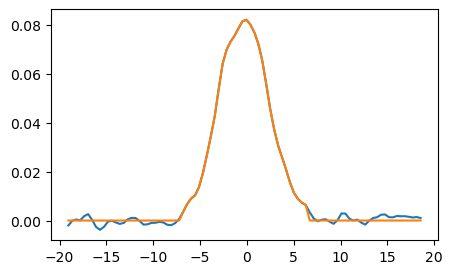

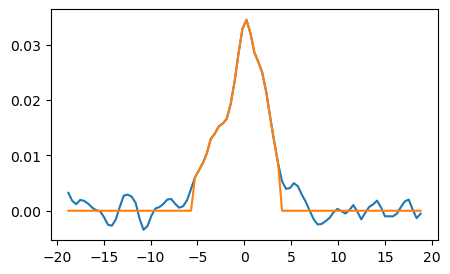

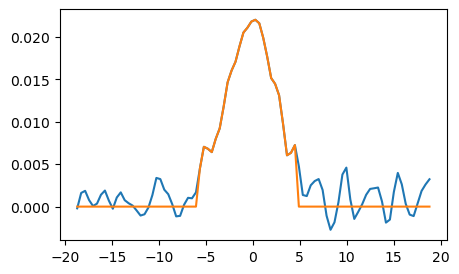

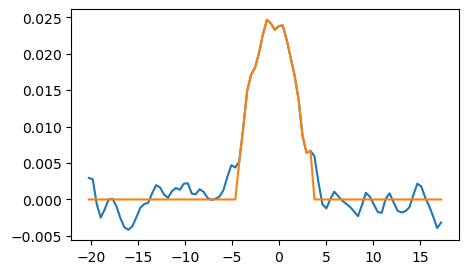

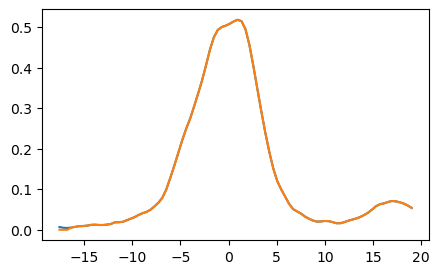

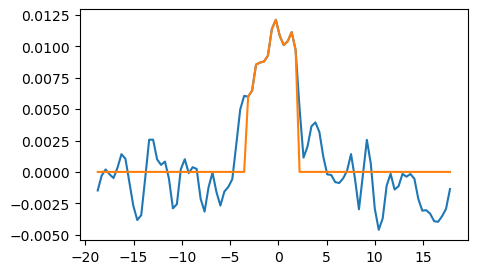

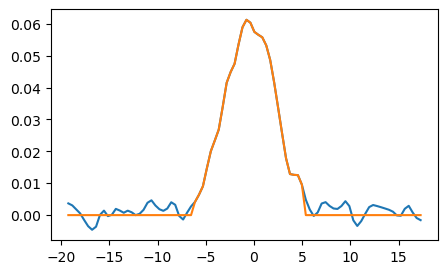

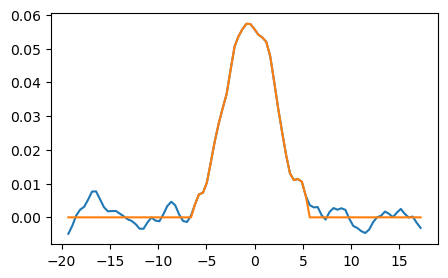

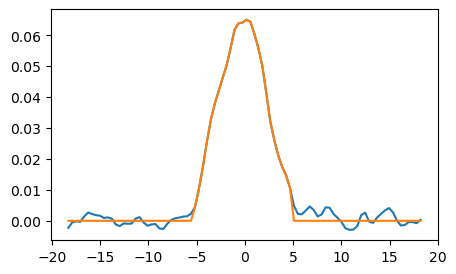

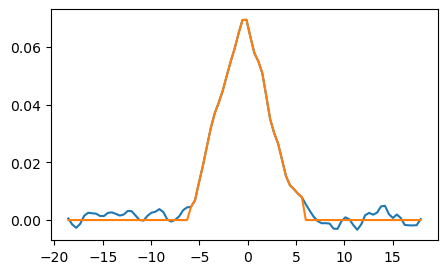

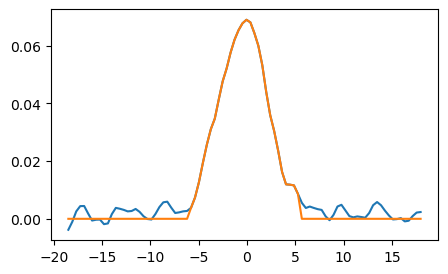

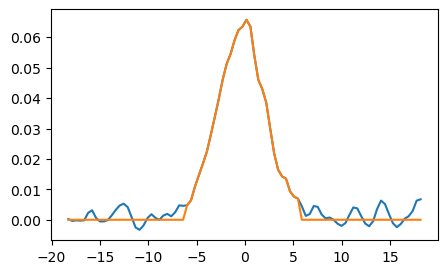

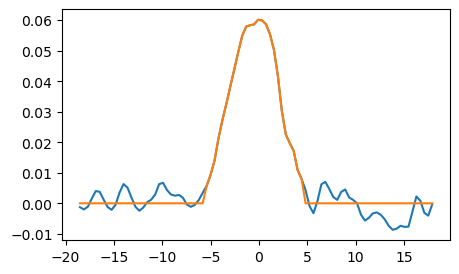

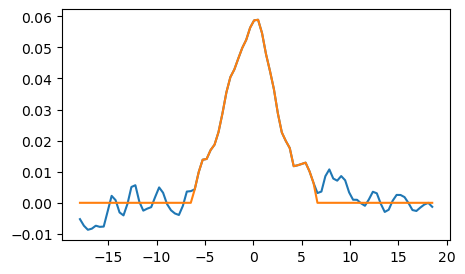

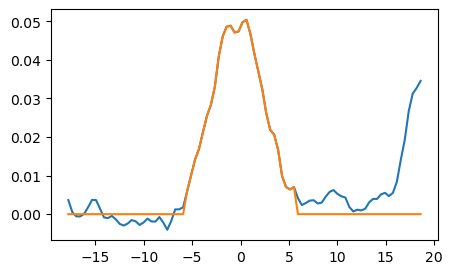

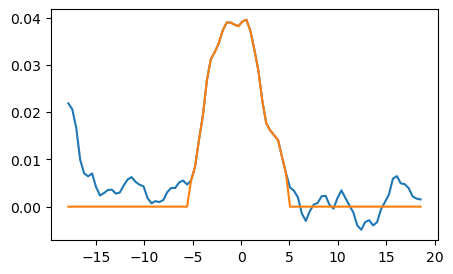

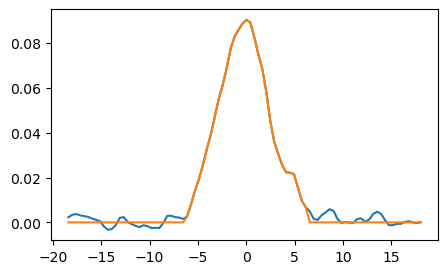

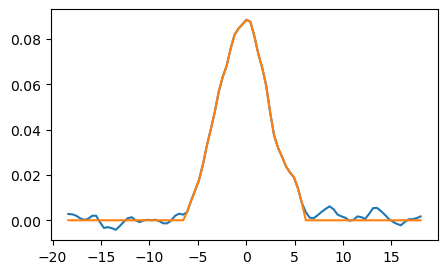

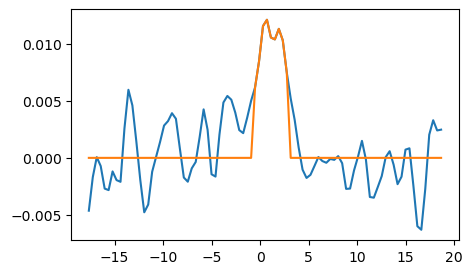

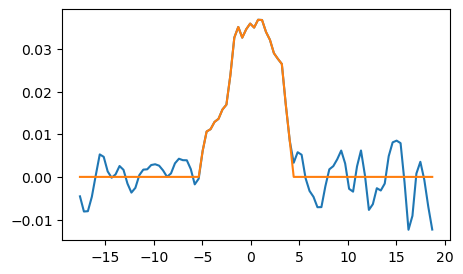

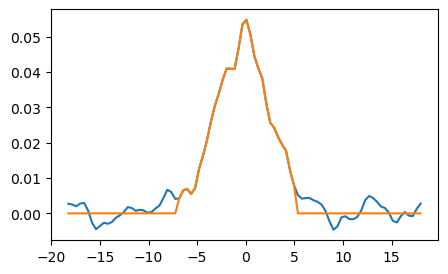

In [44]:
data_flux=[]

f=[]  # 用来组合成字典的列表
flux=[]
for i in range(len(x_large)):
    list_x=[]
    list_y=[]
    for j in range(len(x_large[i])):            # 把某一个峰的列表数据取出来 peak1=x_large[i]=[x,x,x,x,x,x]
        list_x.append((c*(x_large[i][j]-peak_fre[i])/peak_fre[i])/1000)   # 将频率转换为速度
        list_y.append(y_large[i][j])
    
#     list_x_hebin,list_y_hebin=hebin(list_x,list_y)   # 合并
    
    list_y_3sigma=remove_3sigma3(list_x,list_y,spw_std)  # 去除噪声
    #list_y_3sigma=remove_3sigma4(list_x,list_y_3sigma,spw_std)
    
    list_y_3sigma_nol=guiyihua(list_y_3sigma)   # 归一化
    
    f.append(list_x)
    flux.append(list_y_3sigma_nol)
    
    plt.figure(figsize=(5,3))
    plt.plot(list_x,list_y)
    plt.plot(list_x,list_y_3sigma)
    plt.show()

In [40]:
# 对齐横坐标
spectra = [
    {"f": f, "flux": flux}
    for f,flux in zip(f, flux)
]

f_new, data_flux = align_spectra_to_grid(spectra, kind='linear')

# 输出结果形状
print("统一频率网格长度:", len(f_new))
print("对齐后的流量矩阵形状:", data_flux.shape)
print(len(data_flux))

统一频率网格长度: 101
对齐后的流量矩阵形状: (32, 101)
32


In [41]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE,MDS, Isomap,LocallyLinearEmbedding,SpectralEmbedding
from sklearn.decomposition import PCA


In [42]:
spec=SpectralEmbedding(n_components=3)
digits_spec=spec.fit_transform(data_flux)
color_map = {'33SO2':'#000000', '13CH3OH???':'#FF0000', 'CO':'#00FF00', 
             'HC15N':'#0000FF', 'CH3OH':'#FFFF00','H13CO+':'#00FFFF','SO+':'#FF00FF',
             'SiO':'#FFA500', 'SO2':'#FFC0CB', 'HCO+':'#FFA07A', 'SO':'#A9A9A9', 'CH3OCH3':'#8B0000',
             '34SO2':'#ADD8E6', 't-HCOOH':'#90EE90', 'SO2_v2=1???':'#D8BFD8'}


D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


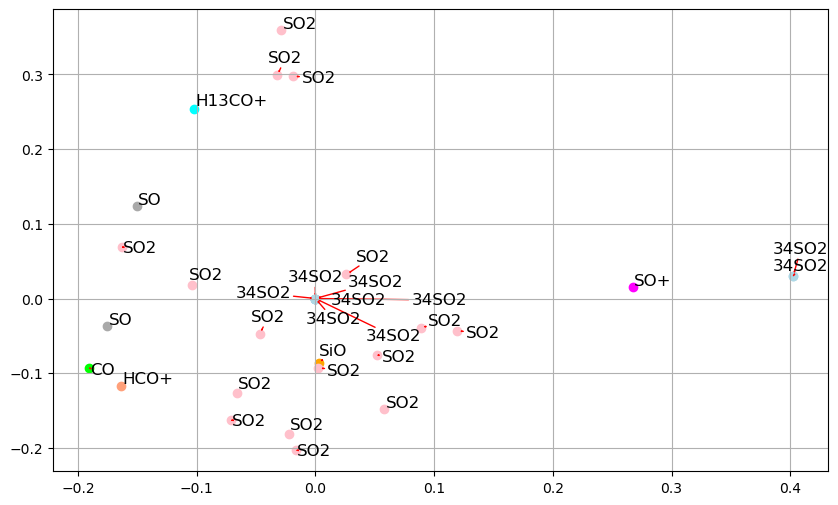

In [43]:
# SpectralEmbedding1
plt.figure(figsize=(10,6))
plt.grid()
# plt.xlim(digits_spec[:,0].min(),digits_spec[:,0].max()+1)
# plt.ylim(digits_spec[:,1].min(),digits_spec[:,1].max()+1)
#plt.xlim(-0.2,0.2)
for i in range(len(digits_spec)):
#     plt.text(digits_spec[i,0],digits_spec[i,1],str(new_name[i]),
#              color=colors[i],
#              fontdict={'weight':'bold','size':15})
    plt.scatter(digits_spec[i, 1], digits_spec[i, 2], color=color_map[peak_name[i]], label=peak_name[i])
    
new_texts = [plt.text(x_, y_, text, fontsize=12) for x_, y_, text in zip(digits_spec[:, 1], digits_spec[:, 2], peak_name)]
adjust_text(new_texts,arrowprops=dict(arrowstyle='->',color='red',lw=1))

plt.show()

In [37]:
# 求平均谱线
def mean_spec(list7):
    mean=[]
    for i in range(len(list7[0])):  # 数据长度
        mean_data=0
        for j in range(len(list7)):   # 有几组数据
            mean_data+=list7[j][i]
        mean.append(mean_data/len(list7))
    return mean

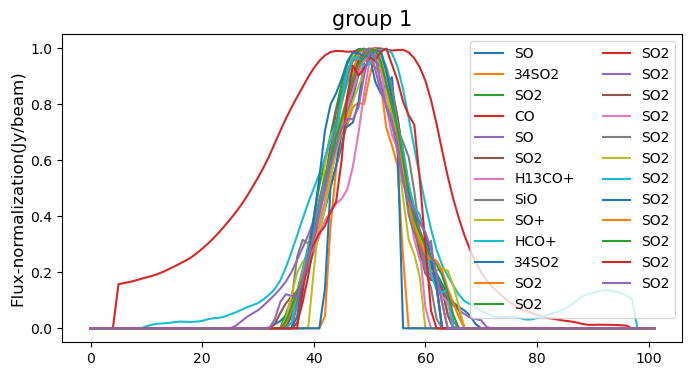

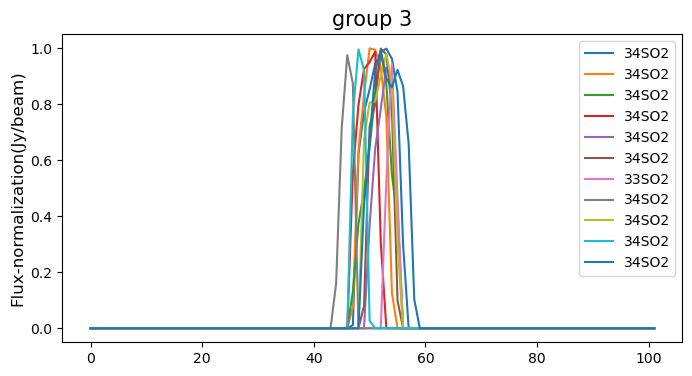

In [40]:
# 将每组谱线画出来
cate1=[]
name1=[]
mean1=[]
cate2=[]
name2=[]
mean2=[]
cate3=[]
name3=[]
mean3=[]
for i in range(len(digits_spec)):
    if digits_spec[i,0]<0.05:
        cate1.append(data_flux[i])
        name1.append(peak_name[i])
        
#     elif 0.05>digits_spec[i,0]:
#         cate2.append(data_flux[i])
#         name2.append(peak_name[i])
        
    elif digits_spec[i,0]>0.05:
        cate3.append(data_flux[i])
        name3.append(peak_name[i])

# 求平均光谱
mean1=mean_spec(cate1)
# mean2=mean_spec(cate2)
mean3=mean_spec(cate3)

# 画图
plt.figure(figsize=(8,4))
for i in range(len(cate1)):  
    plt.plot(cate1[i],label=name1[i])

#plt.plot(mean1,linewidth=10,color="b")
plt.title("group 1",fontsize=15)
plt.ylabel("Flux-normalization(Jy/beam)",fontsize=12)
#plt.ylim(-0.05,0.1)
plt.legend(ncol=2)
plt.show()

# plt.figure(figsize=(8,4))
# for i in range(len(cate2)):
#     plt.plot(cate2[i],label=name2[i])

# #plt.plot(mean2,linewidth=10,color="b")
# plt.title("group 2",fontsize=15)
# plt.ylabel("Flux-normalization(Jy/beam)",fontsize=12)
# #plt.xlim(25,150)
# plt.legend()
# plt.show()

plt.figure(figsize=(8,4))
for i in range(len(cate3)):
    plt.plot(cate3[i],label=name3[i])

#plt.plot(mean3,linewidth=10,color="b")
plt.title("group 3",fontsize=15)
plt.ylabel("Flux-normalization(Jy/beam)",fontsize=12)
#plt.xlim(25,150)
plt.legend()
plt.show()